<a href="https://colab.research.google.com/github/sankethk1/Credit-card-fraud-detection/blob/main/credit_card_fraud_detectionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = ("/content/drive/MyDrive/CSV/creditcard.csv")


In [ ]:
df = pd.read_csv(path)

In [ ]:
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [ ]:
df.isnull().values.any()

False

In [ ]:
no_f = len(df[df.Class == 0])
f= len(df[df.Class == 1])
f_percentage = (f / (no_f + f)) * 100
print("Number of No_fraud transactions: ", no_f)
print("Number of Fraud transactions: ", f)
print("Percentage of Fraud transactions: {:.4f}".format(f_percentage))

Number of No_fraud transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


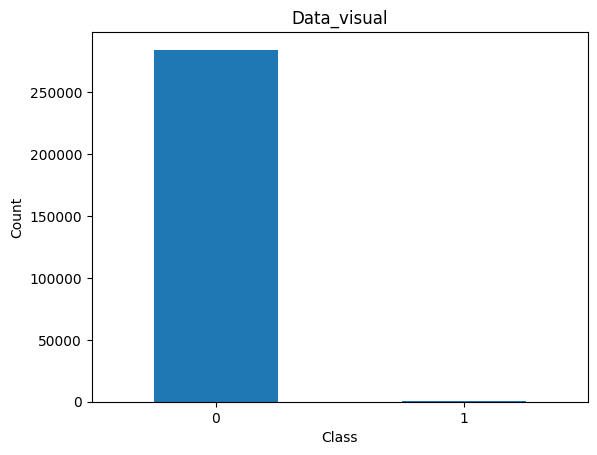

In [ ]:

labels = ["No_fraud", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Data_visual")
plt.ylabel("Count")

plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler

In [ ]:

scaler = StandardScaler()
df["Norm_Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

df.drop(["Amount", "Time"], inplace= True, axis= 1)
Y = df["Class"]
X = df.drop(["Class"], axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.35, random_state= 50)
print("Shape of train_X: ", X_train.shape)
print("Shape of test_X: ", X_test.shape)

Shape of train_X:  (185124, 29)
Shape of test_X:  (99683, 29)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

random_forest = RandomForestClassifier(n_estimators= 100)

In [ ]:
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = decision_tree.predict(X_test)
dt_score = decision_tree.score(X_test, Y_test) * 100

In [ ]:
print(dt_score)

99.92676785409749


In [ ]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
pred_rf = random_forest.predict(X_test)
rf_score = random_forest.score(X_test, Y_test) * 100

In [ ]:
print(rf_score)

99.95184735611889


In [ ]:
from sklearn.metrics import  recall_score,  precision_score, f1_score, accuracy_score,confusion_matrix
def final(val, pred):
    print("Accuracy: {:.5f}".format(accuracy_score(val, pred)))
    print("Precision: {:.5f}".format(precision_score(val, pred)))
    print("Recall: {:.5f}".format(recall_score(val, pred)))
    print("F1-score: {:.5f}".format(f1_score(val, pred)))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(Y_test,pred_dt)

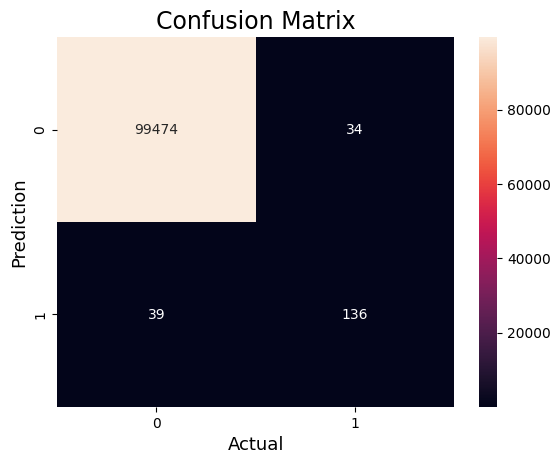

In [ ]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print("Evaluation of Decision Tree Model")
print()
final(Y_test, pred_dt)

In [ ]:
cm2 = confusion_matrix(Y_test,pred_rf)

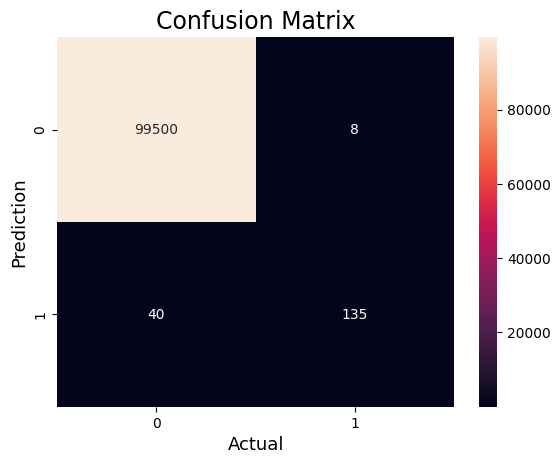

In [ ]:
sns.heatmap(cm2,
            annot=True,
            fmt='g',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
print("Evaluation of Random forest Model")
print()
final(Y_test, pred_rf)

Evaluation of Random forest Model

Accuracy: 0.99952
Precision: 0.94406
Recall: 0.77143
F1-score: 0.84906


In [ ]:
from imblearn.over_sampling import SMOTE
X_new, Y_new = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_new.shape)
print("Resampled shape of Y: ", Y_new.shape)


(X_train, X_test, Y_train, Y_test) = train_test_split(X_new, Y_new, test_size= 0.35, random_state= 50)

Resampled shape of X:  (568630, 29)
Resampled shape of Y:  (568630,)


In [ ]:
rf_new = RandomForestClassifier(n_estimators = 100)
rf_new.fit(X_train, Y_train)
pred_new = rf_new.predict(X_test)
rf_score_new = rf_new.score(X_test, Y_test) * 100

In [ ]:
cm3 = confusion_matrix(Y_test,pred_new)

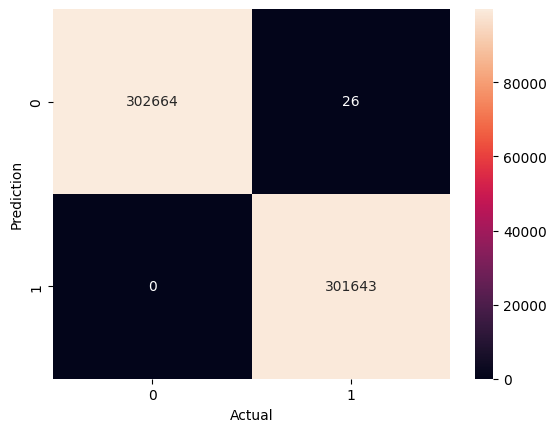

In [ ]:
sns.heatmap(cm3,
            annot=True,
            fmt='o',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.ylabel('Prediction')
plt.xlabel('Actual')
plt.show()

In [ ]:
print("Evaluation of Random forest Model")
print()
final(Y_test, pred_new)

Evaluation of Random forest Model

Accuracy: 0.99989
Precision: 0.99978
Recall: 1.00000
F1-score: 0.99989
